In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, r2_score, recall_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

# Load Data

In [2]:
from sklearn import datasets

iris_data = datasets.load_iris()

In [3]:
iris_features = iris_data.feature_names
class_names = iris_data.target_names

In [4]:
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

In [5]:
X = iris_data.data
y = iris_data.target

In [6]:
len(X), len(y)

(150, 150)

# Data Exploration

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


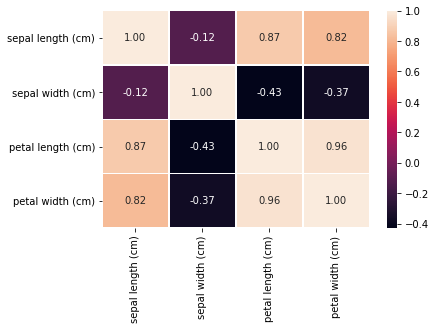

In [8]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt=".2f");

# Model Selection

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Without Normalization

In [10]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
accuracy_score(y_test, pred)

0.9333333333333333

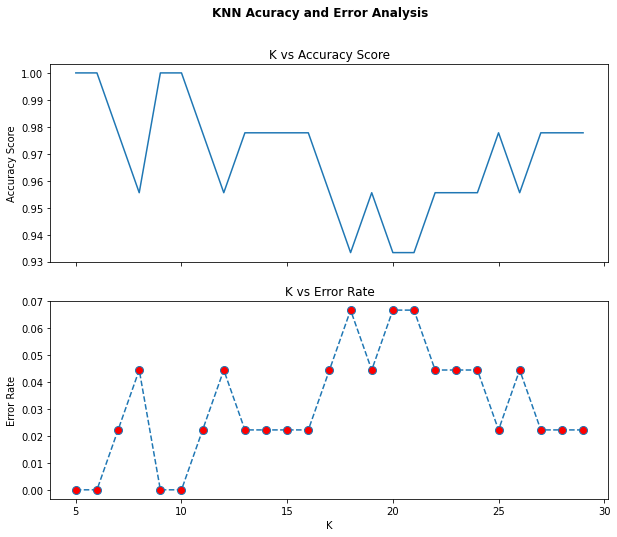

In [11]:
k_list = [*range(5, 30)]
acc_scores = []
error_rate = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    
    acc_scores.append(accuracy_score(y_test, pred))
    error_rate.append(np.mean(pred != y_test))
    
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,sharex=True,figsize=(10, 8))
ax1.plot(k_list, acc_scores);

ax1.set(title="K vs Accuracy Score",
        xlabel="",
        ylabel="Accuracy Score")

ax2.plot(k_list, error_rate, linestyle="dashed", marker='o',markerfacecolor='red', markersize=8)
ax2.set(title="K vs Error Rate",
       xlabel="K",
       ylabel="Error Rate")


# Title the figure
fig.suptitle('KNN Acuracy and Error Analysis', fontsize=12, fontweight='bold');

## with normalization

In [12]:
target = pd.DataFrame(iris_data.target, columns=['target'])
# X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3, random_state=42)

In [13]:
# data normalization with sklean
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform train and test data
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

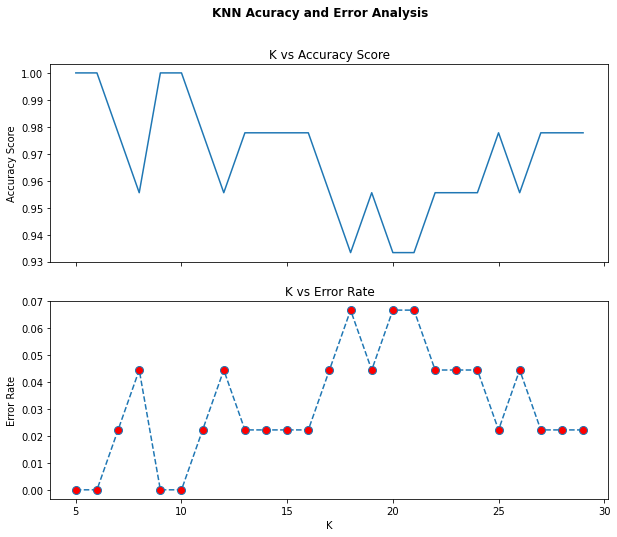

In [14]:
k_list = [*range(5, 30)]
acc_scores = []
error_rate = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    
    acc_scores.append(accuracy_score(y_test, pred))
    error_rate.append(np.mean(pred != y_test))
    
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,sharex=True,figsize=(10, 8))
ax1.plot(k_list, acc_scores);

ax1.set(title="K vs Accuracy Score",
        xlabel="",
        ylabel="Accuracy Score")

ax2.plot(k_list, error_rate, linestyle="dashed", marker='o',markerfacecolor='red', markersize=8)
ax2.set(title="K vs Error Rate",
       xlabel="K",
       ylabel="Error Rate")


# Title the figure
fig.suptitle('KNN Acuracy and Error Analysis', fontsize=12, fontweight='bold');

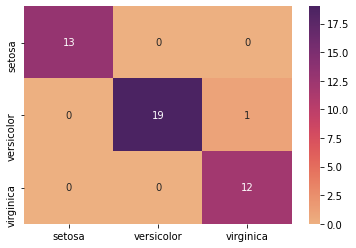

In [15]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names,
           cmap=sns.cm.flare);

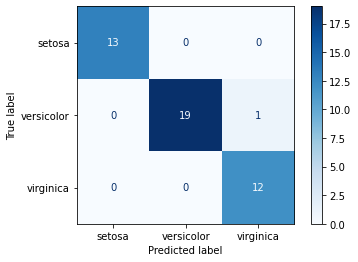

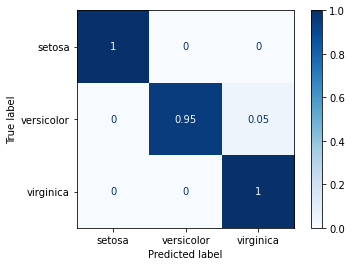

In [16]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn,X_test, y_test,
                                normalize=normalize,
                                display_labels=class_names,
                                cmap=plt.cm.Blues)

In [17]:
models = {"KNN": KNeighborsClassifier(),
         "Logistic Regression": LogisticRegression()}
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name]  = model.score(X_test, y_test)
    return model_scores


In [18]:
model_scores = fit_and_score(models= models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

/home/codemonk/development_tools/pyenv/mlenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 1.0, 'Logistic Regression': 0.9777777777777777}

# Writting KNN from scratch

In [19]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum(np.square(x1 - x2)))

def train(X_train, y_train):
    return

def predict(X_train, y_train, X_test, k):
    distances = []
    neighbors = []
    
    for i in range(len(X_train)):
        # Compute and store euclidean distance
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i]))), i])
        
        # sort the distances
        distances = sorted(distances)
        
    for i in range(k):
        index = distances[i][1]
        neighbors.append(y_train[i])
    return neighbors

def k_nearest_neighbor(X_train, y_train, X_test, k):
    assert k <= len(X_train), "[X] Size of  K must be smaller than of samples data"
    
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i], k))
    
    return np.asanyarray(predictions)

In [20]:
ed = []
for i in range(len(X_test)):
    ed.append(np.array([euclidean_distance(X_test[i], X_t) for X_t in X_train]))
#     distances = [euclidean_distance(X_test[i], X_t) for X_t in X_train]
#     ed.append(distances)
    

In [21]:
from collections import Counter
import math

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum(np.square(x1 - x2)))

def mean(labels):
    return sum(labels) / len(labels)

def mode(labels):
    return Counter(labels).most_common(1)[0][0]

class KNNClassifier:
    def __init__(self, k=5, voting_option = mode):
        self.K = k
        self.voting_option = voting_option
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, X_test):
        assert self.K <= len(X_train), "Expected k less than sample size"
        
        predictions = []
        distances = []
        # 1. Iterate over all test data
        for i in range(len(X_test)):
            
            # 2. Calculate Euclidean Distance for each test data
            distances = np.array(np.sqrt(np.sum(np.square(self.X - X_test[i]), axis=1)))
#             distances = np.array([euclidean_distance(X_t, X_test[i]) for X_t in self.X])

            # 3. Sort the distances and get indices of min. distances up to n_neighbors
            sorted_distances_index = distances.argsort()[:self.K]
        
            # 4. Get labels for selected n_neighbors data
            k_nearest_labels = [self.y[index] for index in sorted_distances_index]
            
            # 5. if voting_option = mean (average), then return average of k_labels
            # Else, return mode that is majority voting
            
            predictions.append(self.voting_option(k_nearest_labels))
            
        
        predictions = np.array(predictions)
        
        return predictions
        

In [22]:
class Model:
    def __init__(self):
        self.accuracy_score
        self.error_rate
    
    def cross_validation_split(X, y, n_folds = 1):
        splits = []
        
        if len(X) != len(y):
            raise ValueError("Found different length of Samples: len(X) = {}, len(y)= {}".format(len(X), len(y)))
        fold_size = int(len(X))
        for _ in range(n_folds):
            pass
                
    
    def error_rate(y_true, y_pred):
        return np.mean(y_true != y_pred)
    
    def accuracy_score(y_true, y_pred):
        return np.mean(y_true == y_pred)
    
    def confusion_matrix(y_true, y_pred):
        pass
    
class MinMaxNormalizer:
    def __init(self, data):
        self.data = data
        self.max_data_
        self.min_data_
        
    def fit(self, data):
        self.data = data
        self.max_data_ = data.max(axis=0)
        self.min_data_ = data.min(axis=0)
        
    def minmax(self, data = None):
        if data is None:
            data = self.data
        return [data.min(axis=0), data.max(axis=0)]
    
    def normalize(self, data = None):
        if data is None:
            data = self.data
        return (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

## without normalization

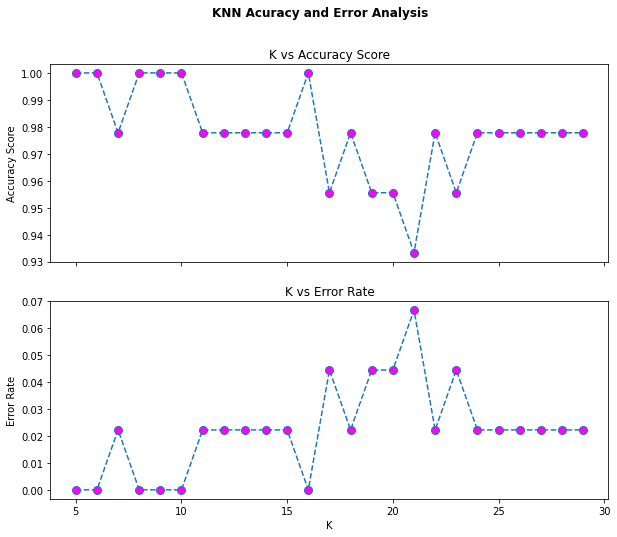

In [24]:
k_list = [*range(5, 30)]
acc_scores = []
error_rate = []
for k in k_list:
    knn = KNNClassifier(k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    
    acc_scores.append(accuracy_score(y_test, pred))
    error_rate.append(np.mean(pred != y_test))
    
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,sharex=True,figsize=(10, 8))
ax1.plot(k_list, acc_scores, linestyle="dashed", marker='o',markerfacecolor='magenta', markersize=8);

ax1.set(title="K vs Accuracy Score",
        xlabel="",
        ylabel="Accuracy Score")

ax2.plot(k_list, error_rate, linestyle="dashed", marker='o',markerfacecolor='magenta', markersize=8)
ax2.set(title="K vs Error Rate",
       xlabel="K",
       ylabel="Error Rate")


# Title the figure
fig.suptitle('KNN Acuracy and Error Analysis', fontsize=12, fontweight='bold');

In [25]:
k_list[acc_scores.index(min(acc_scores))]

21

In [26]:
clf = KNNClassifier(k=8)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
accuracy_score(y_test, pred)

1.0

In [27]:
confusion_matrix(y_test, pred)

array([[13,  0,  0],
       [ 0, 20,  0],
       [ 0,  0, 12]])

## with normalization

In [28]:
normalizer = MinMaxNormalizer()
normalizer.fit(X_train)
X_train_normalize = normalizer.normalize()
X_test_normalize = normalizer.normalize(X_test)

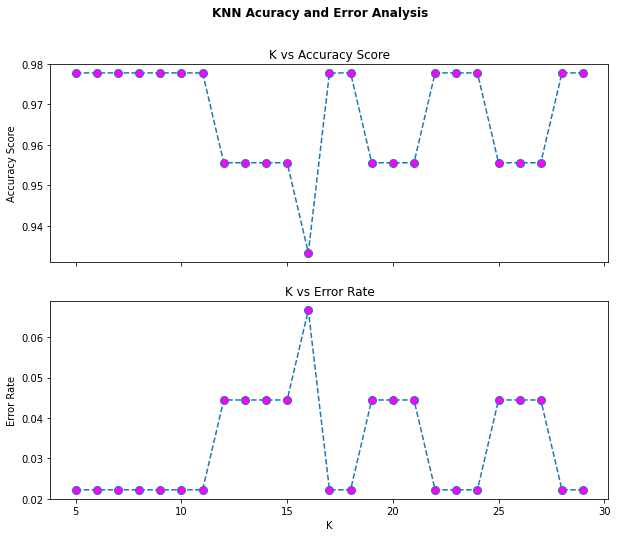

In [29]:
k_list = [*range(5, 30)]
acc_scores = []
error_rate = []
for k in k_list:
    knn = KNNClassifier(k)
    knn.fit(X_train_normalize, y_train)
    pred = knn.predict(X_test_normalize)
    
    acc_scores.append(accuracy_score(y_test, pred))
    error_rate.append(np.mean(pred != y_test))
    
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,sharex=True,figsize=(10, 8))
ax1.plot(k_list, acc_scores, linestyle="dashed", marker='o',markerfacecolor='magenta', markersize=8);

ax1.set(title="K vs Accuracy Score",
        xlabel="",
        ylabel="Accuracy Score")

ax2.plot(k_list, error_rate, linestyle="dashed", marker='o',markerfacecolor='magenta', markersize=8)
ax2.set(title="K vs Error Rate",
       xlabel="K",
       ylabel="Error Rate")


# Title the figure
fig.suptitle('KNN Acuracy and Error Analysis', fontsize=12, fontweight='bold');

In [30]:
clf = KNNClassifier(k=8)

clf.fit(X_train_normalize, y_train)
pred = clf.predict(X_test_normalize)

Model.accuracy_score(y_test, pred), Model.error_rate(y_test, pred)

(0.9777777777777777, 0.022222222222222223)